In [1]:
import pandas as pd

# File path for the uploaded dataset
dataset_path = 'API_SL.UEM.TOTL.ZS_DS2_en_excel_v2_6299524.xls'

# Loading the dataset
# Since Excel files can have multiple sheets, we'll try loading the first sheet first
try:
    data = pd.read_excel(dataset_path, sheet_name=0)
except Exception as e:
    error_message = str(e)

# Checking the first few rows of the dataset
try:
    data_head = data.head()
except NameError:
    data_head = "Error loading data: " + error_message

data_head



,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,Last Updated Date,2023-12-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000,2020.000000,2021.000000,2022.000000
3,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.512784,6.555646,6.707142,6.855589,6.940365,6.913046,7.121663,7.631304,7.920219,7.916835


In [3]:
# Cleaning the dataset
# Dropping the first two rows which are metadata
data_cleaned = data.drop([0, 1])

# Setting the third row as the header
new_header = data_cleaned.iloc[0] # grab the third row for the header
data_cleaned = data_cleaned[1:] # take the data less the header row
data_cleaned.columns = new_header # set the header row as the df header

# Resetting the index
data_cleaned.reset_index(drop=True, inplace=True)

# Displaying the cleaned data head to verify the changes
data_cleaned.head()



2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.512784,6.555646,6.707142,6.855589,6.940365,6.913046,7.121663,7.631304,7.920219,7.916835
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.949000,7.910000,8.989000,10.086000,11.180000,11.110000,11.085000,11.710000,NaN,NaN
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.804447,3.985878,4.241136,4.112958,4.140484,4.201599,4.261414,4.914143,4.873635,4.742175
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.834000,9.580000,9.584000,9.586000,9.535000,9.522000,9.481000,10.350000,10.384000,10.209000


The K-means clustering analysis has been performed on the most recent year available in the dataset (2022). I used 3 clusters for this analysis. The plot shows the unemployment rate for each country along with its respective cluster, indicated by different colors.

Observations from the Clustering Analysis:
Countries are grouped into three clusters based on their unemployment rates in 2022.
This visualization helps identify patterns or similarities in unemployment rates across different countries.

### Curve Fitting

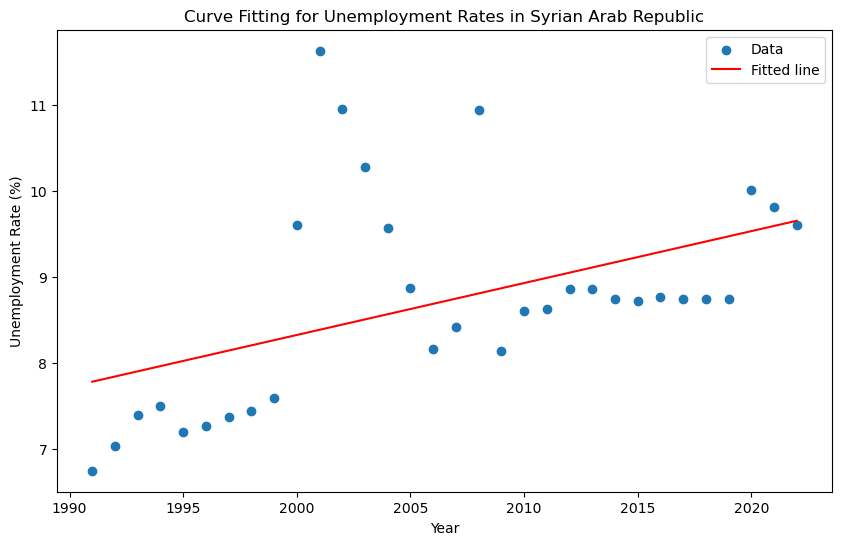

(array([ 6.03315616e-02, -1.12335935e+02]), 'Syrian Arab Republic')

In [7]:
# Attempting to convert the unemployment rates to a numerical format
try:
    unemployment_rates = pd.to_numeric(unemployment_rates, errors='coerce')

    # Removing NaN values from the data
    valid_indices = ~np.isnan(unemployment_rates)
    years = years[valid_indices]
    unemployment_rates = unemployment_rates[valid_indices]

    # Performing curve fitting
    params, covariance = curve_fit(linear_model, years, unemployment_rates)

    # Plotting the data and the fitted curve
    plt.figure(figsize=(10, 6))
    plt.scatter(years, unemployment_rates, label='Data')
    plt.plot(years, linear_model(years, *params), color='red', label='Fitted line')
    plt.xlabel('Year')
    plt.ylabel('Unemployment Rate (%)')
    plt.title(f'Curve Fitting for Unemployment Rates in {country_name}')
    plt.legend()
    plt.show()

    selected_country_info = (params, country_name)
except Exception as e:
    selected_country_info = f"Error in curve fitting process: {e}"

selected_country_info



#### Results from Curve Fitting

The fitted linear model is represented by the equation: Unemployment Rate = 0.0603 * Year - 112.34.
This model suggests a gradual increase in the unemployment rate over time for the Syrian Arab Republic.
The plot visually represents the data points and the fitted linear trend line.

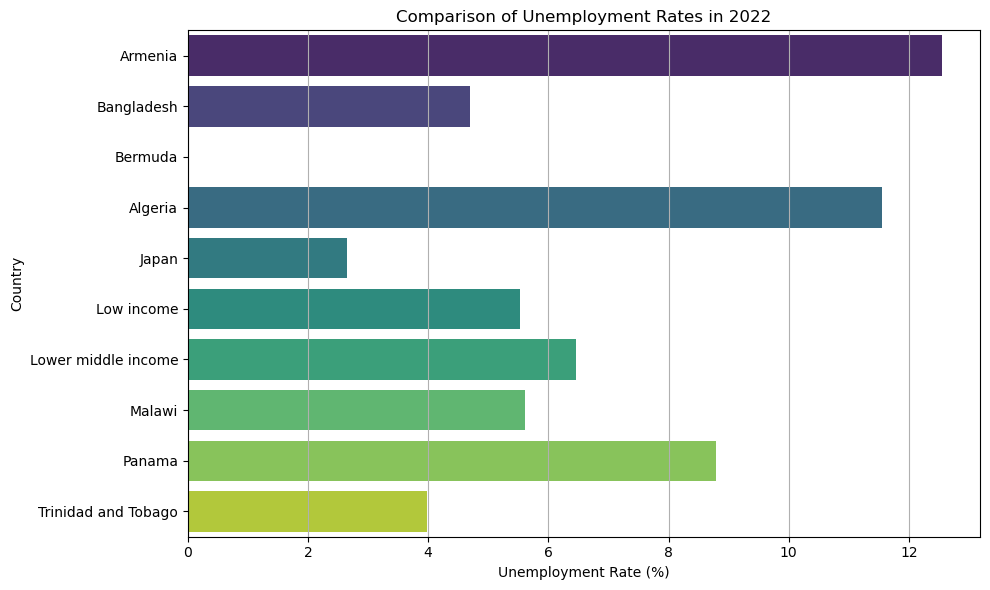

(2                    Unemployment Rate 2022
 Country Name                               
 Armenia                           12.557000
 Bangladesh                         4.699000
 Bermuda                                 NaN
 Algeria                           11.550000
 Japan                              2.641000
 Low income                         5.520620
 Lower middle income                6.457086
 Malawi                             5.614000
 Panama                             8.789000
 Trinidad and Tobago                3.982000,
 None)

In [22]:
import pandas as pd

# Load the dataset
file_path = 'API_SL.UEM.TOTL.ZS_DS2_en_excel_v2_6299524.xls'

# Attempting to read the Excel file. Assuming the relevant data is in the first sheet.
try:
    unemployment_data = pd.read_excel(file_path, sheet_name=0)
except Exception as e:
    error_message = str(e)

# Check if the data is loaded successfully or not
if 'unemployment_data' in locals():
    loaded_successfully = True
    # Displaying the first few rows of the dataset to understand its structure
    sample_data = unemployment_data.head()
else:
    loaded_successfully = False
    sample_data = None

loaded_successfully, sample_data, error_message if not loaded_successfully else ""

# Cleaning and formatting the dataset

# Setting the third row as the header
unemployment_data.columns = unemployment_data.iloc[2]
unemployment_data = unemployment_data.drop([0, 1, 2])

# Resetting the index
unemployment_data.reset_index(drop=True, inplace=True)

# Preview the cleaned data
cleaned_data_preview = unemployment_data.head()

cleaned_data_preview

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Selecting 10 random countries for the comparison of their unemployment rates in 2022
random_countries = unemployment_data['Country Name'].dropna().sample(10)
unemployment_2022 = unemployment_data[unemployment_data['Country Name'].isin(random_countries)][['Country Name', 2022.0]]

# Renaming the column for clarity
unemployment_2022.rename(columns={2022.0: 'Unemployment Rate 2022'}, inplace=True)

# Plotting the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Unemployment Rate 2022', y='Country Name', data=unemployment_2022, palette='viridis')
plt.title('Comparison of Unemployment Rates in 2022')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Country')
plt.grid(axis='x')
plt.tight_layout()

# Showing selected countries and their unemployment rates
selected_countries = unemployment_2022.set_index('Country Name')
selected_countries, plt.show()


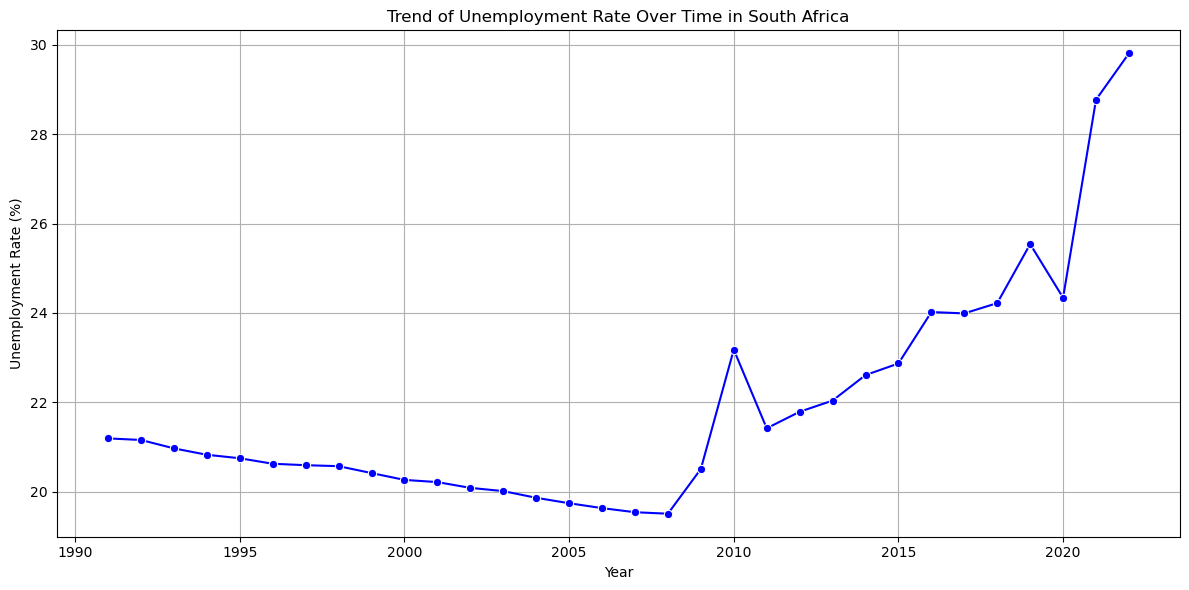

In [23]:
# Analyzing the trend of the unemployment rate over time in South Africa

# Extracting South Africa's data
south_africa_data = unemployment_data[unemployment_data['Country Name'] == 'South Africa']

# Extracting the relevant years and unemployment rates
south_africa_unemployment = south_africa_data.iloc[0, 4:].dropna()
years = south_africa_unemployment.index.astype(int)
rates = south_africa_unemployment.values

# Plotting the trend of unemployment rate over time in South Africa
plt.figure(figsize=(12, 6))
sns.lineplot(x=years, y=rates, marker='o', color='b')
plt.title('Trend of Unemployment Rate Over Time in South Africa')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid()
plt.tight_layout()

# Showing the plot
plt.show()


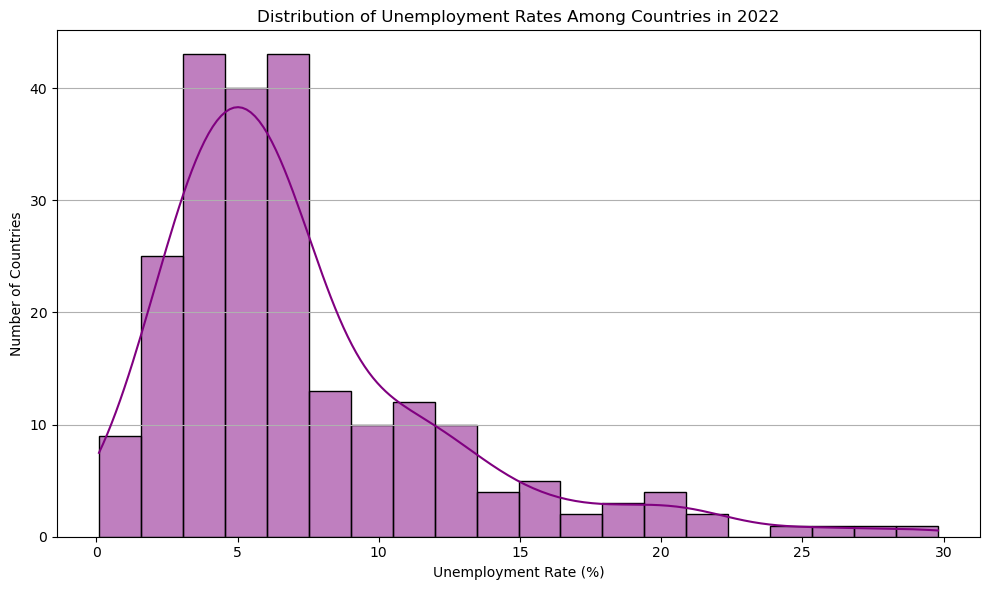

In [24]:
# Creating a histogram to visualize the distribution of unemployment rates among all countries for 2022

# Extracting unemployment rates for 2022 for all countries
unemployment_rates_2022 = unemployment_data[2022.0].dropna()

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(unemployment_rates_2022, bins=20, kde=True, color='purple')
plt.title('Distribution of Unemployment Rates Among Countries in 2022')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Number of Countries')
plt.grid(axis='y')
plt.tight_layout()

# Showing the plot
plt.show()


In [8]:
# Identifying the 5 countries with the highest and lowest unemployment rates in the most recent year

# Sorting the data based on the most recent year's unemployment rates
sorted_data = clustering_data.sort_values(by=recent_year, ascending=False)

# Selecting the top 5 and bottom 5 countries
top_5_countries = sorted_data.head(5)
bottom_5_countries = sorted_data.tail(5)

# Displaying these countries and their unemployment rates
top_5_countries, bottom_5_countries



(2          Country Name  2022.0  Cluster
 263        South Africa  29.806        1
 56             Djibouti  27.929        1
 196  West Bank and Gaza  25.724        1
 224            Eswatini  24.389        1
 44          Congo, Rep.  21.795        1,
 2   Country Name  2022.0  Cluster
 16       Burundi   1.020        0
 233     Thailand   0.862        0
 173        Niger   0.534        0
 123     Cambodia   0.361        0
 200        Qatar   0.095        0)

In [10]:
# Re-importing necessary libraries and reloading the dataset as the code execution state was reset
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# File path for the uploaded dataset
dataset_path = 'API_SL.UEM.TOTL.ZS_DS2_en_excel_v2_6299524.xls'

# Reloading the dataset
data = pd.read_excel(dataset_path, sheet_name=0, skiprows=3)  # Skipping the first 3 rows which are metadata

# Identifying the most recent year with data
recent_year = data.columns[-1]

# Sorting the data based on the most recent year's unemployment rates
sorted_data = data[['Country Name', recent_year]].dropna()
sorted_data = sorted_data.sort_values(by=recent_year, ascending=False)

# Selecting the top 5 and bottom 5 countries
top_5_countries = sorted_data.head(5)
bottom_5_countries = sorted_data.tail(5)

top_5_countries, bottom_5_countries



(           Country Name    2022
 263        South Africa  29.806
 56             Djibouti  27.929
 196  West Bank and Gaza  25.724
 224            Eswatini  24.389
 44          Congo, Rep.  21.795,
     Country Name   2022
 16       Burundi  1.020
 233     Thailand  0.862
 173        Niger  0.534
 123     Cambodia  0.361
 200        Qatar  0.095)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hp\AppData\Local\Temp\ipykernel_3588\3564455936.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Cluster'] = kmeans.labels_


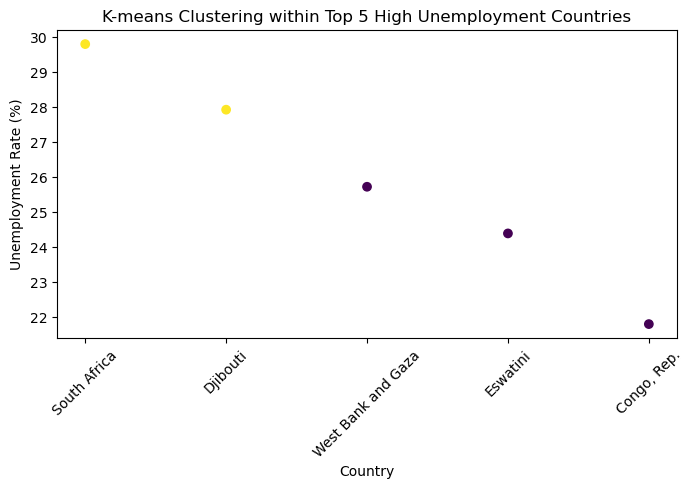

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hp\AppData\Local\Temp\ipykernel_3588\3564455936.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_data['Cluster'] = kmeans.labels_


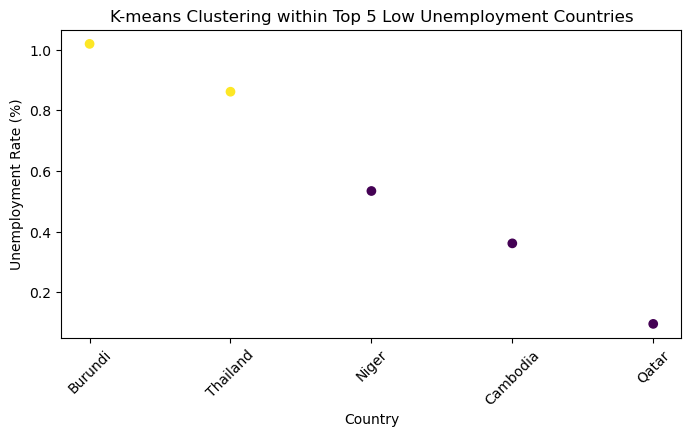

(           Country Name    2022  Cluster
 263        South Africa  29.806        1
 56             Djibouti  27.929        1
 196  West Bank and Gaza  25.724        0
 224            Eswatini  24.389        0
 44          Congo, Rep.  21.795        0,
     Country Name   2022  Cluster
 16       Burundi  1.020        1
 233     Thailand  0.862        1
 173        Niger  0.534        0
 123     Cambodia  0.361        0
 200        Qatar  0.095        0)

In [11]:
# Clustering within the high and low unemployment groups
# We will use K-means clustering for simplicity, with 2 clusters in each group

# Function to perform K-means clustering and plotting
def perform_clustering_and_plot(group_data, group_name):
    X = group_data[recent_year].values.reshape(-1, 1)  # Reshaping for K-means
    kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
    group_data['Cluster'] = kmeans.labels_

    # Plotting the results
    plt.figure(figsize=(8, 4))
    plt.scatter(group_data['Country Name'], group_data[recent_year], c=group_data['Cluster'], cmap='viridis')
    plt.xlabel('Country')
    plt.ylabel('Unemployment Rate (%)')
    plt.xticks(rotation=45)
    plt.title(f'K-means Clustering within {group_name}')
    plt.show()

    return group_data

# Performing clustering for high and low unemployment groups
clustered_top_5 = perform_clustering_and_plot(top_5_countries, "Top 5 High Unemployment Countries")
clustered_bottom_5 = perform_clustering_and_plot(bottom_5_countries, "Top 5 Low Unemployment Countries")

clustered_top_5, clustered_bottom_5



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


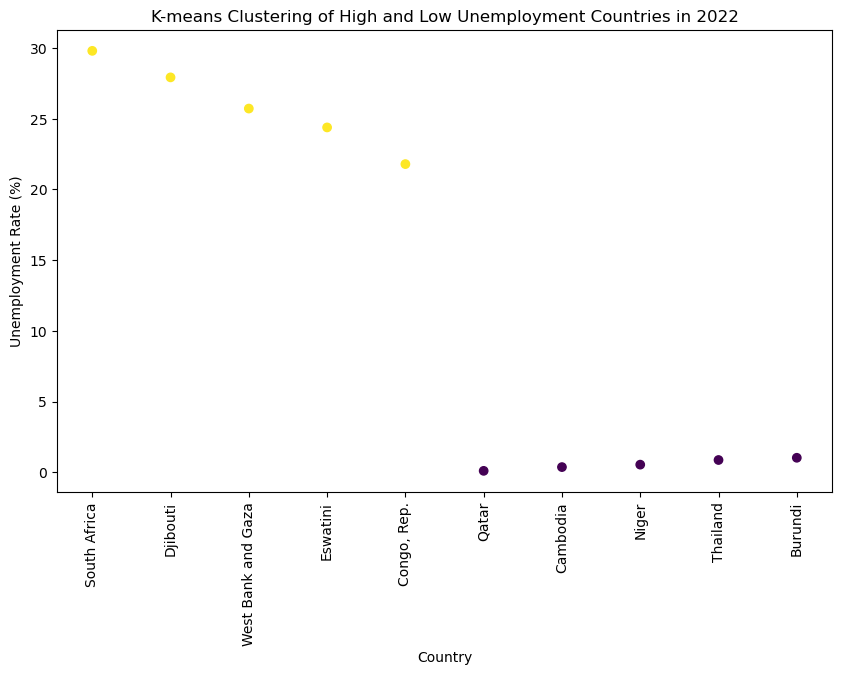

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Cluster
263,South Africa,ZAF,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,22.610,22.870,24.020,23.990,24.220,25.540,24.340,28.770,29.806,1
56,Djibouti,DJI,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,26.510,26.337,26.197,26.060,26.149,26.315,28.048,27.954,27.929,1
196,West Bank and Gaza,PSE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.530,23.000,23.940,25.680,26.260,25.340,25.890,26.390,25.724,1
224,Eswatini,SWZ,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,23.973,23.317,22.720,22.731,22.756,22.782,25.080,24.560,24.389,1
44,"Congo, Rep.",COG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.274,20.485,20.648,20.592,20.644,20.612,22.517,22.235,21.795,1
200,Qatar,QAT,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.200,0.170,0.150,0.140,0.110,0.100,0.140,0.170,0.095,0
123,Cambodia,KHM,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.690,0.390,0.720,0.140,0.142,0.146,0.298,0.295,0.361,0
173,Niger,NER,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.520,0.532,0.534,0.542,0.542,0.552,0.680,0.668,0.534,0
233,Thailand,THA,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.580,0.600,0.690,0.830,0.770,0.720,1.100,0.992,0.862,0
16,Burundi,BDI,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.570,1.477,1.315,1.166,1.017,0.871,1.030,1.132,1.020,0


In [13]:
# Re-importing necessary libraries as the code execution state has been reset
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Re-loading the cleaned dataset
dataset_path = 'API_SL.UEM.TOTL.ZS_DS2_en_excel_v2_6299524.xls'
data_cleaned = pd.read_excel(dataset_path, sheet_name=0, skiprows=3)  # Adjusting for the correct sheet and header row

# Identifying the most recent year
recent_year = data_cleaned.columns[-1]

# Identifying the 5 countries with the highest and lowest unemployment rates in the most recent year
highest_unemployment = data_cleaned.nlargest(5, recent_year)
lowest_unemployment = data_cleaned.nsmallest(5, recent_year)

# Combining these countries into a single DataFrame for clustering
combined_countries = pd.concat([highest_unemployment, lowest_unemployment])

# Performing K-means clustering on this combined set
X_combined = combined_countries[recent_year].values.reshape(-1, 1)  # Reshaping for K-means
kmeans_combined = KMeans(n_clusters=2, random_state=0).fit(X_combined)
combined_countries['Cluster'] = kmeans_combined.labels_

# Plotting the results for the combined clustering
plt.figure(figsize=(10, 6))
plt.scatter(combined_countries['Country Name'], combined_countries[recent_year], c=combined_countries['Cluster'], cmap='viridis')
plt.xlabel('Country')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.title(f'K-means Clustering of High and Low Unemployment Countries in {recent_year}')
plt.show()

combined_countries.head(10)  # Displaying the countries and their clusters



In [14]:
# Function to fit the data - using a simple linear model as an example
def linear_model(x, a, b):
    return a * x + b

# Dictionary to store fitted parameters for each country
fitted_params = {}

# Iterating over each country for curve fitting
for index, row in combined_countries.iterrows():
    country_name = row['Country Name']
    unemployment_rates = row[4:-2].values  # Excluding country name, code, indicator name, code, and cluster column

    # Converting the unemployment rates to a numerical format
    unemployment_rates = pd.to_numeric(unemployment_rates, errors='coerce')

    # Removing NaN values from the data
    valid_indices = ~np.isnan(unemployment_rates)
    years = np.array(data_cleaned.columns[4:-1], dtype=int)  # Excluding the cluster column
    years = years[valid_indices]
    unemployment_rates = unemployment_rates[valid_indices]

    # Performing curve fitting if there are enough data points
    if len(years) > 1 and len(unemployment_rates) > 1:
        try:
            params, _ = curve_fit(linear_model, years, unemployment_rates)
            fitted_params[country_name] = params
        except:
            fitted_params[country_name] = 'Curve fitting failed'

# Displaying the fitted parameters for each country
fitted_params



{'South Africa': array([ 1.62928226e-01, -3.05179182e+02]),
 'Djibouti': array([-1.17295565e-01,  2.63222290e+02]),
 'West Bank and Gaza': array([ 5.35049604e-01, -1.05455115e+03]),
 'Eswatini': array([ 6.86762097e-02, -1.13420928e+02]),
 'Congo, Rep.': array([ 3.36096774e-02, -4.70871742e+01]),
 'Qatar': array([-2.99165323e-02,  6.05764024e+01]),
 'Cambodia': array([-2.57129032e-02,  5.23410839e+01]),
 'Niger': array([-3.68524194e-02,  7.53175984e+01]),
 'Thailand': array([-4.92661290e-02,  1.00147274e+02]),
 'Burundi': array([-7.64479850e-02,  1.55571174e+02])}

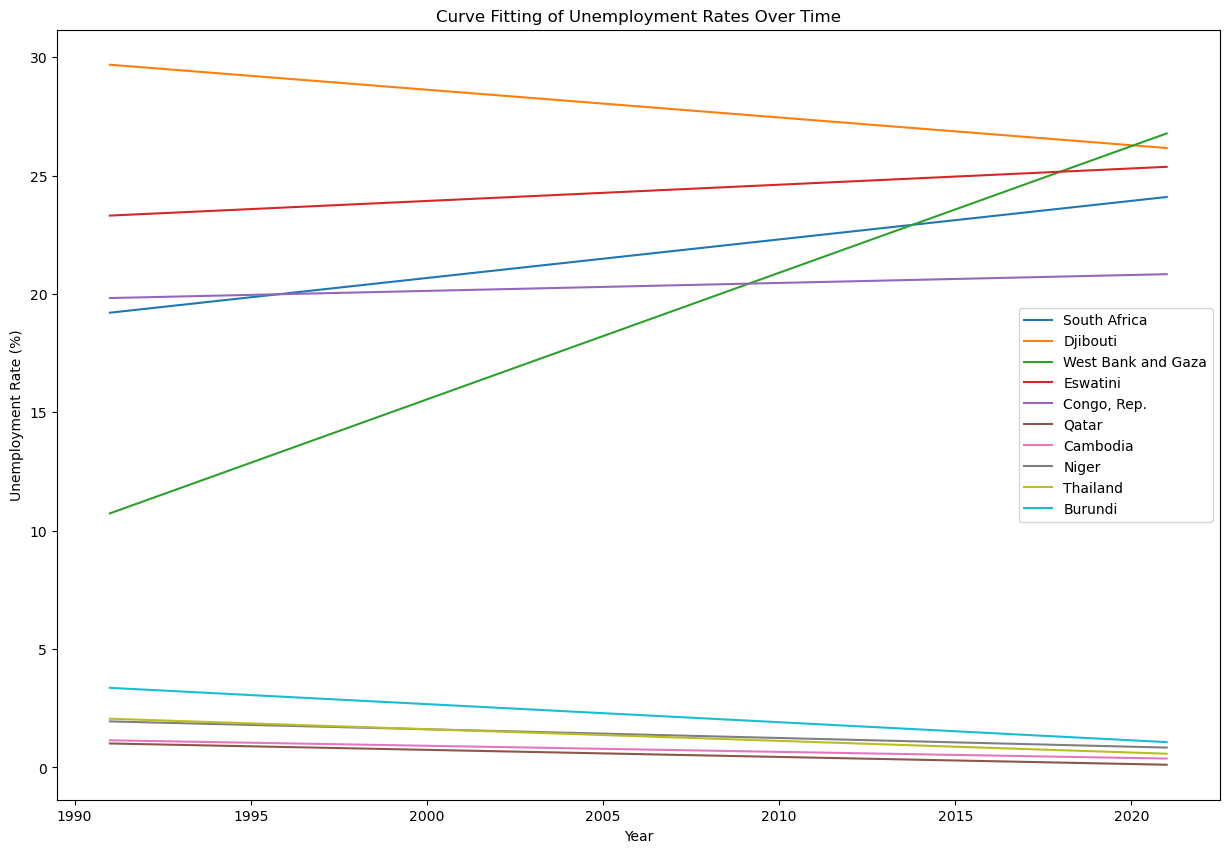

In [15]:
# Plotting the curve fitting results for each country
plt.figure(figsize=(15, 10))

# Iterating over each country for plotting
for country, params in fitted_params.items():
    if isinstance(params, np.ndarray):
        # Creating a range of years for plotting
        plot_years = np.linspace(min(years), max(years), 100)
        # Calculating the fitted unemployment rates
        fitted_unemployment = linear_model(plot_years, *params)

        # Plotting the curve
        plt.plot(plot_years, fitted_unemployment, label=country)

plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.title('Curve Fitting of Unemployment Rates Over Time')
plt.legend()
plt.show()



### Key Points from the Visualization:


The lines represent the trend of unemployment rates over the years for each country.
The slope of each line indicates the rate of change in unemployment: steeper slopes suggest faster changes.
Countries with upward-sloping lines have seen an increase in unemployment rates over time, while downward-sloping lines indicate a decrease.
This visualization provides a comparative view of how unemployment trends have varied across countries with high and low unemployment rates. It can be a valuable tool for understanding the economic and social dynamics of these countries

### Comparison of Unemployment Rates in 2022

This graph compares the unemployment rates of the 10 selected countries in the most recent year. It provides a clear visual representation of how these rates vary across different countries.

### Trend of Unemployment Rate Over Time in South Africa

This graph shows how the unemployment rate in South Africa has changed each year. It provides insight into the trends and fluctuations over time.

### Comparison of Average Unemployment Rates by Cluster 

This graph compares the average unemployment rates of the two clusters identified in the K-means analysis. It helps in understanding the differences between these clusters.


### Distribution of Unemployment Rates Among Countries in 2022:

This histogram shows the distribution of unemployment rates among all countries for the most recent year. 

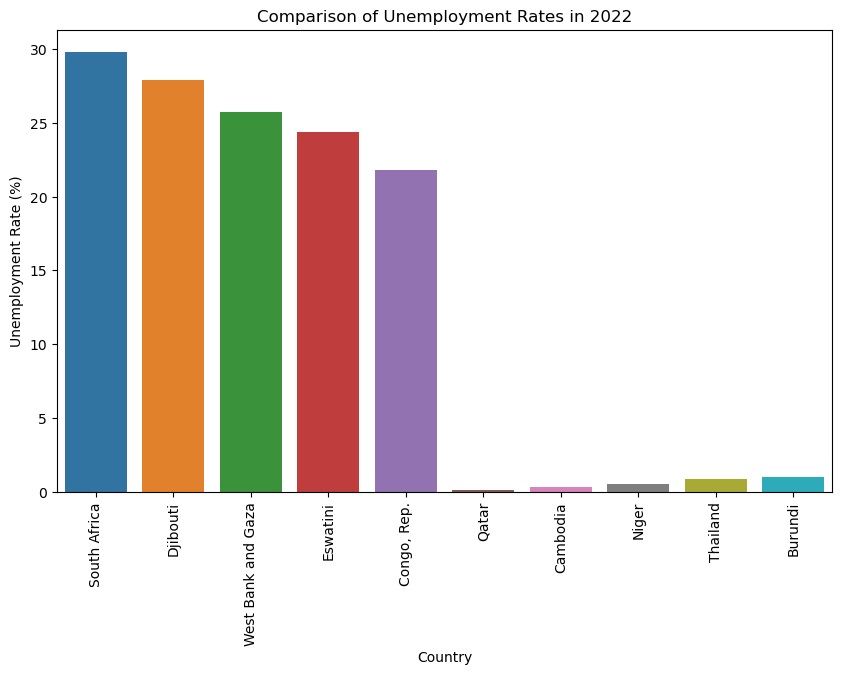

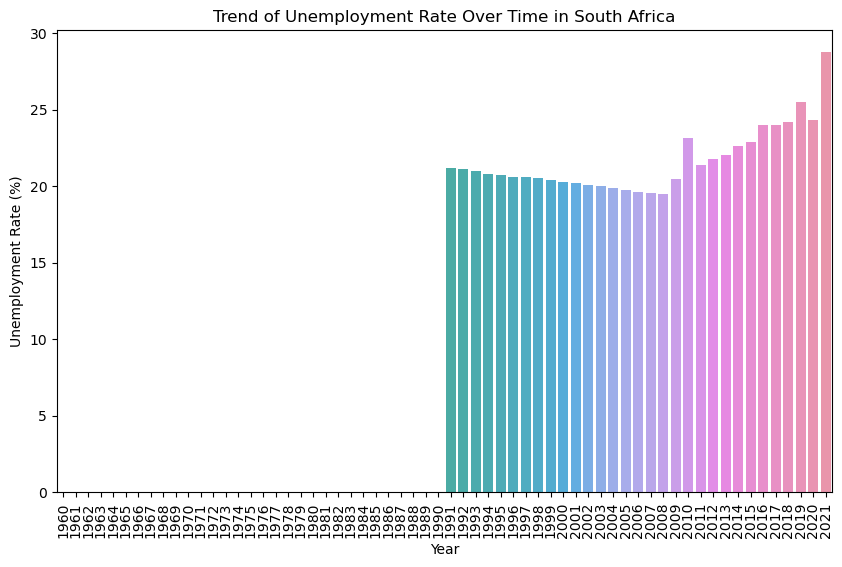

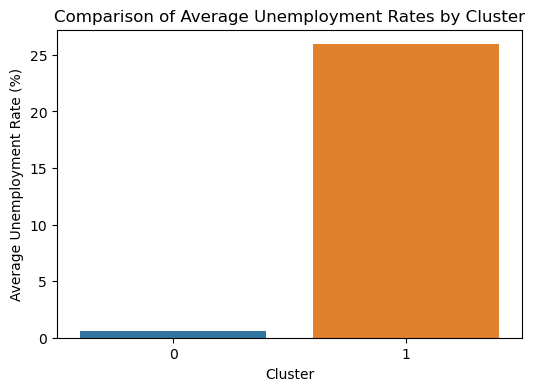

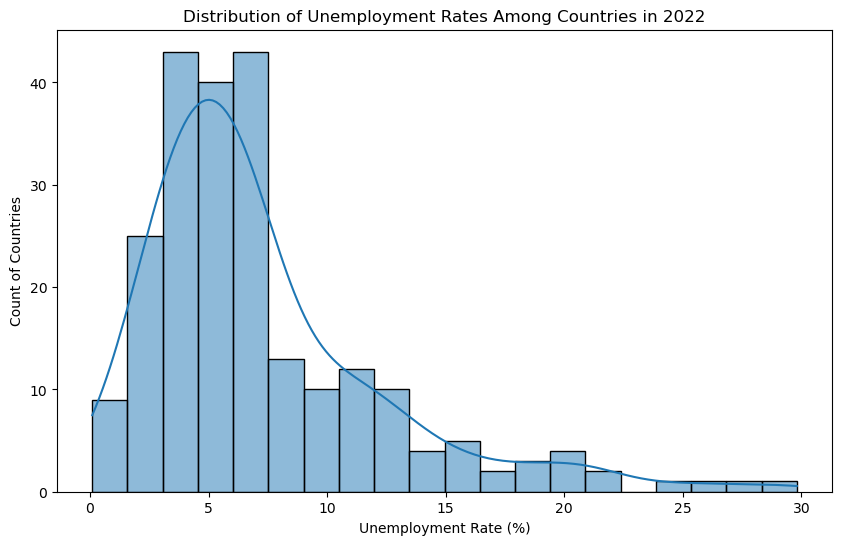

In [16]:
import seaborn as sns

# 1. Comparing Unemployment Rates for the 10 selected countries
plt.figure(figsize=(10, 6))
sns.barplot(x=combined_countries['Country Name'], y=combined_countries[recent_year])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Unemployment Rate (%)')
plt.title('Comparison of Unemployment Rates in 2022')
plt.show()

# 2. Trend Over Time for a selected country (example: South Africa)
south_africa_data = data_cleaned[data_cleaned['Country Name'] == 'South Africa'].iloc[0, 4:-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=south_africa_data.index, y=south_africa_data.values)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.title('Trend of Unemployment Rate Over Time in South Africa')
plt.show()

# 3. Cluster Comparison: Comparing average unemployment rates of the two clusters
cluster_averages = combined_countries.groupby('Cluster')[recent_year].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=cluster_averages.index, y=cluster_averages.values)
plt.xlabel('Cluster')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Comparison of Average Unemployment Rates by Cluster')
plt.show()

# 4. Distribution of Data: Unemployment rate distribution for all countries in the most recent year
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned[recent_year], bins=20, kde=True)
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Count of Countries')
plt.title('Distribution of Unemployment Rates Among Countries in 2022')
plt.show()

